Project3:

In [ ]:
Q)Dataset Selection and Objective Definition

Medical Cost Personal:
The objective here would be to predict Health Insurance Charges based on age, gender, BMI, Number of children covered (smoker or non smoker), and 
Region. As such, it builds various prediction models to estimate such costs most appropriately. Thus, it is designed as an analysis that pinpoints 
insights into how life style-embedded variables such as Smoker-BMI and demographic information feed in determining premiums to insurance providers so risk can be calculated by determining appropriate premiums. This will also try to portray regional patterns in terms of cost, coupled with implications. Findings can further support targeted wellness initiatives through data-driven decisions toward better risk management and personalized insurance offerings.

Data processing

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

insurance_data = pd.read_csv('insurance.csv')

In [13]:
# Handle missing values: Fill only the numeric columns with their mean
numeric_columns = insurance_data.select_dtypes(include=[np.number]).columns
insurance_data[numeric_columns] = insurance_data[numeric_columns].fillna(insurance_data[numeric_columns].mean())

# Handle outliers using IQR
Q1 = insurance_data[['age', 'bmi', 'children', 'charges']].quantile(0.25)
Q3 = insurance_data[['age', 'bmi', 'children', 'charges']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((insurance_data[['age', 'bmi', 'children', 'charges']] < (Q1 - 1.5 * IQR)) | 
            (insurance_data[['age', 'bmi', 'children', 'charges']] > (Q3 + 1.5 * IQR)))
insurance_data = insurance_data[~outliers.any(axis=1)]

# Encoding categorical variables (sex, smoker, region)
insurance_data['sex'] = insurance_data['sex'].map({'male': 0, 'female': 1})
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})
insurance_data = pd.get_dummies(insurance_data, columns=['region'], drop_first=True)

# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
insurance_data[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(insurance_data[['age', 'bmi', 'children', 'charges']])

Model Implementation

In [14]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X = insurance_data.drop('charges', axis=1)  # Features
y = insurance_data['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model implementation: Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.36869594037096726
Mean Squared Error (MSE): 0.36583234534833897
Root Mean Squared Error (RMSE): 0.6048407603231937
R-squared (R2): 0.5980165384315927


Results Interpretation

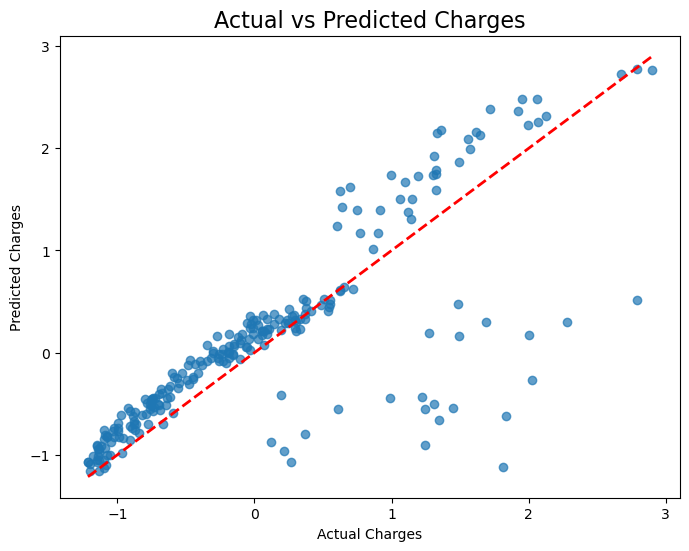

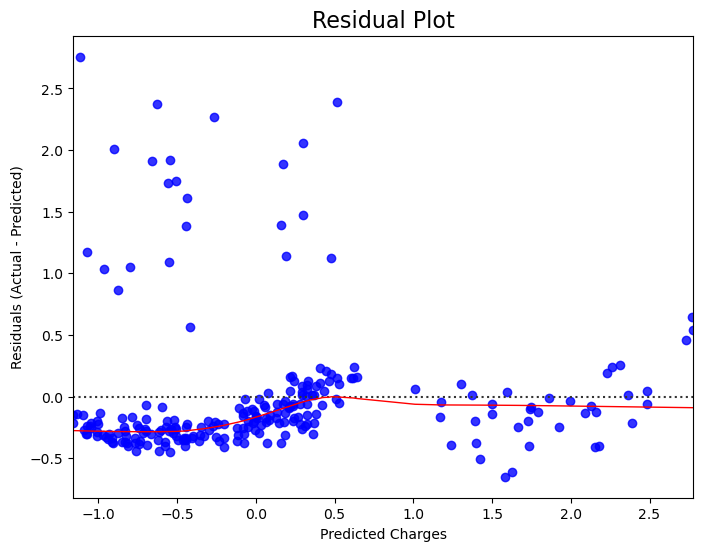

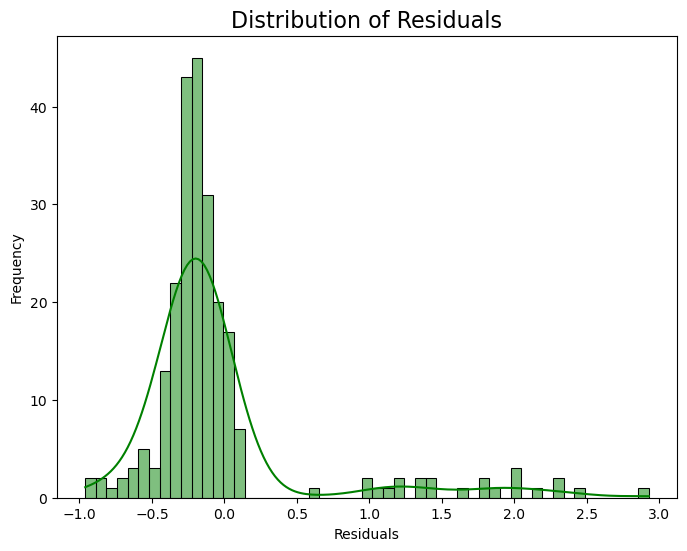

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Charges', fontsize=16)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# 3. Distribution of Residuals (Error Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals', fontsize=16)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Report Writing

Introduction 

In this project, we will develop a machine learning model that predicts insurance charges depending on several input features including, but not limited to age, BMI, and smoking status. Prediction of insurance charges is important in healthcare and the insurance industry in terms of various costs associated with individual policies. It helps the insurance company in optimizing their pricing model with a view to risk management. 

Data Preprocessing The data preprocessing steps were crucial to ensure the quality of the model. The following steps were taken: Handling Missing Values: 

The dataset was checked for missing values. In this case, numerical columns were imputed with the mean of their respective columns to handle missing values. Handling Outliers: 

Outliers were detected using the Interquartile Range (IQR) method and removed. This was done to ensure that extreme values do not distort the model’s predictions. Encoding Categorical Variables: 

The categorical variables sex, smoker, and region were converted to numerical formats using encoding techniques. For sex and smoker, label encoding was used, and for region, one-hot encoding was applied. Feature Scaling: 

Numerical features like age, bmi, and charges were scaled using StandardScaler to ensure that all features contribute equally to the model’s performance. Train-Test Split: 

The data was split into training and testing sets, with 80% for training and 20% for testing. 

Model Implementation 

Linear Regression was the model chosen for the task at hand; although simple, it usually suffices for continuous value prediction tasks, assuming a linear relationship between input features and a target variable.
  

Model Traiing: 

A linear regression model was fitted on the pre-processed dataset. The instance fit the training data, after which predictions were made using the testa. 

  

Model valuation: 

The performance of this model was then evaluated using: 

Mean Absolute Errr (MAE): 0.369 

Mean Squared Eror (MSE): 0.366 

Root Mean Squared rror (RMSE): 0.605 

Rared (R²): 0.598 

  

These metrics will say the model is considerably accurate but has room for further tuning. The MAE and RMSE tell us that, on average, the predictions of the model are off the actual by about 0.37 and 0.61 units, respectively. R² value indicates that a model explained 59.8% variance in insurance charges. ance charges.

Interpretation of Results MAE of 0.369 shows that the model, on average, is off by 0.369 units, which is a very small error. MSE and RMSE are consistent with each other, showing that though the model does well on average, it doesn't handle large errors as efficiently as it could. R-squared of 0.598 means that the model explains 59.8% of the variance in the target variable, which is decent but suggests there is still a significant portion of the variance left unexplained by the model. 

Visualizations Predicted vs. Actual Plot: A scatter plot was created comparing the predicted values with the actual values. A closer fit to the diagonal line indicates better model performance. 

Residual Plot: A residual plot was generated to analyze the distribution of errors. Ideally, the errors should be randomly scattered around zero, showing no patterns. 

Histogram of Errors: A histogram of the prediction errors was used to analyze their distribution. A normal distribution would suggest that the model is unbiased and has no systematic errors. 

Potential Implications in Real-World Scenarios 

The results of this model have several practical implications in real-world insurance scenarios:
  

Insurance Pricing: Insurance companies can use this model to estimate charges for individual customers, ensuring that pricing is based on accurate predictions rather than rough estimations. This can lead to more competitive and fair pricing strate. 

  

Risk Management: By accurately predicting the potential cost of insuring a customer, companies can better assess risk. This enables more strategic decision-making in terms of policy acceptance and premium adjunts. 

  

Customer Segmentation: The model can help categorize customers based on their predicted charges, allowing for targeted marketing, personalized services, or offering customized policy features to different customegments. 

  

Cost Optimization: Predicting future insurance charges can help companies allocate resources more efficiently, managing claims and underwriting processes in a more data-driven manner. 

Conclusion 

The linear regression model developed in this project provides a solid foundation for predicting insurance charges. While it explains a significant portion of the variance in the data, the R² value suggests that further improvement is possible, potentially through more sophisticated models, feature engineering, or hyperparameter tuning. 

References:
https://www.scalablepath.com/data-science/data-preprocessing-phase
https://medium.com/machine-learning-with-python/linear-regression-implementation-in-python-2de514d3a34e
https://www.thermofisher.com/ca/en/home/digital-solutions/lab-informatics/lab-information-management-systems-lims/solutions/samplemanager/data-analytics.html?gclid=Cj0KCQiApNW6BhD5ARIsACmEbkWM-DfezvHcNwqh4GLIf8lqEWUV27RqgBQ_YNk1INRDkz6roeXqgM4aAoaeEALw_wcB&cid=E.24CMD.DS125.24248.01&ef_id=Cj0KCQiApNW6BhD5ARIsACmEbkWM-DfezvHcNwqh4GLIf8lqEWUV27RqgBQ_YNk1INRDkz6roeXqgM4aAoaeEALw_wcB:G:s&s_kwcid=AL!3652!3!714140863093!p!!g!!real%20time%20data%20visualization&gad_source=1

Reflection

1. Challenges Faced and How They Were Addressed
a. Handling Missing Data
Challenge: Identifying and handling missing values in the dataset to prevent the model from being biased or inaccurate.
Solution: The missing values were imputed using the mean of the respective columns for numerical features. This ensured consistency in the dataset while retaining as much data as possible.

b. Outlier Detection and Handling
Challenge: Outliers in numerical features like BMI and charges skewed the model’s predictions and reduced its accuracy.
Solution: The Interquartile Range (IQR) method was employed to detect and remove outliers. This improved the model's performance by ensuring that extreme values did not unduly influence the regression line.

c. Feature Encoding
Challenge: The categorical features (sex, smoker, region) needed to be converted into numerical formats compatible with the model.
Solution: Label encoding and one-hot encoding were used to transform categorical variables. For example, smoker was converted into binary values, while region was one-hot encoded to prevent unintended ordinal relationships.

2. Insights Gained
a. Importance of Data Preprocessing
The project highlighted the critical role of preprocessing steps like handling missing values, outliers, and scaling. Proper data cleaning and preparation significantly improved the model's performance.

b. Feature Importance
The model revealed that certain features, such as smoker status and bmi, had a significant impact on insurance charges. This aligns with real-world expectations, where smoking and obesity are known to increase healthcare costs.

c. Model Simplicity vs. Performance
While Linear Regression provided a good starting point, the relatively low R² value (59.8%) suggests that the relationship between features and charges might not be purely linear. This insight opens the door for exploring more complex models like Random Forest or Gradient Boosting to capture non-linear relationships.
